### Columns - For refrence during code creation and variable assigning
#### From Kaggle documentation - https://www.kaggle.com/datasets/jakubkhalponiak/phones-2024

Columns:
phone_brand:
The manufacturer or brand of the phone (e.g., Apple, Samsung, Xiaomi).

phone_model:
The specific model name or number of the phone.

store:
The specific store where the phone is listed.

price:
The price of the phone as a floating-point number in the native currency. This column should always be analyzed together with the currency column.

currency:
The currency in which the price is set (e.g., USD, EUR).

price_USD:
The price of the phone converted to USD.

storage:
The amount of storage in GB (integer).

ram:
The amount of RAM in GB (integer).

Launch:
The launch date of the phone (in datetime format).

Dimensions:
The exact dimensions of the phone, for example: 163.8 x 76.8 x 8.9 mm (6.45 x 3.02 x 0.35 in).

Weight:
The weight of the phone in grams (float).

Display_Type:
The type of display, for example: LTPO Super Retina XDR OLED, 120Hz, HDR10, Dolby Vision, 1000 nits (typ), 2000 nits (HBM).

Display_Size:
The display size in inches.

Display_Resolution:
The resolution of the display, for example: 1280 x 2856.

OS:
The operating system of the phone, for example: iOS 18, Android 14.

NFC:
A flag indicating whether the phone has NFC:
1 - Has NFC,
0 - Does not have NFC.

USB:
The USB type, for example: USB Type-C 3.2 Gen 2, DisplayPort.

BATTERY:
The battery capacity in mAh.

Features_Sensors:
Features and sensors included in the phone.

Colors:
The color options for the phone model, for example: Black Titanium, White Titanium, Natural Titanium, Desert Titanium.

Video:
Camera specifications for video recording, for example: 4K@24/25/30/60/100/120fps, 1080p@25/30/60/120/240fps, 10-bit HDR, Dolby Vision HDR (up to 60fps), ProRes, 3D (spatial) video/audio, stereo sound rec.

Chipset:
The chipset used in the phone, for example: Apple A18 Pro (3 nm).

CPU:
The CPU specifications, for example: Hexa-core (2x4.05 GHz + 4x2.42 GHz).

GPU:
The GPU specifications, for example: Apple GPU (6-core graphics).

Year:
The year in which the phone model was released.

Foldable:
A flag indicating whether the phone is foldable:
1 - Phone is foldable,
0 - Phone is not foldable.

PPI_Density:
The pixel density in pixels per inch (ppi).

quantile_10:
The 10th quantile of the price for phones in a given year.

quantile_50:
The 50th quantile (median) of the price for phones in a given year.

quantile_90:
The 90th quantile of the price for phones in a given year.

price_range:
Price range classification (low price, medium price, high price), based on quantiles in a given year.

In [46]:
import pandas as pd

# load the dataset into the df var
df = pd.read_csv('/Users/tdgilbert/Documents/processed_data2.csv')

# display the first few rows of the dataframe to briefly inspect the data
df.head()


,phone_brand,phone_model,store,price_usd,storage,ram,launch_date,dimensions,weight,display_type,...,price_range,os_type,os_version,battery_size,colors_available,chip_company,cpu_core,gpu_company,fingerprint,video_resolution
0,apple,Apple iPhone 16 Pro,Amazon DE,1357.55,256,8,2024-09-20,149.6 x 71.5 x 8.3 mm (5.89 x 2.81 x 0.33 in),199.0,"LTPO Super Retina XDR OLED, 120Hz, HDR10, Dolb...",...,medium price,iOS,18,Medium,4,Apple,Hexa-core,Apple,Face,4K
1,apple,Apple iPhone 16 Pro,Amazon DE,1492.55,512,8,2024-09-20,149.6 x 71.5 x 8.3 mm (5.89 x 2.81 x 0.33 in),199.0,"LTPO Super Retina XDR OLED, 120Hz, HDR10, Dolb...",...,high price,iOS,18,Medium,4,Apple,Hexa-core,Apple,Face,4K
2,apple,Apple iPhone 16 Pro,Amazon DE,1705.32,1000,8,2024-09-20,149.6 x 71.5 x 8.3 mm (5.89 x 2.81 x 0.33 in),199.0,"LTPO Super Retina XDR OLED, 120Hz, HDR10, Dolb...",...,high price,iOS,18,Medium,4,Apple,Hexa-core,Apple,Face,4K
3,apple,Apple iPhone 16 Pro Max,Amazon DE,1564.92,512,8,2024-09-20,163 x 77.6 x 8.3 mm (6.42 x 3.06 x 0.33 in),227.0,"LTPO Super Retina XDR OLED, 120Hz, HDR10, Dolb...",...,high price,iOS,18,Large,4,Apple,Hexa-core,Apple,Face,4K
4,apple,Apple iPhone 12 mini,Amazon DE,247.32,128,4,2020-11-13,131.5 x 64.2 x 7.4 mm (5.18 x 2.53 x 0.29 in),135.0,"Super Retina XDR OLED, HDR10, Dolby Vision, 62...",...,medium price,iOS,14.1,Small,6,Apple,Hexa-core,Apple,Face,4K


The above cell was simply to import the pandas library and ensure I can approprietly access the dataset as a dataframe, the reason we only see Apple phones is becuase its sorted alphabetically and so the top 5 are all new iphones

In [54]:
# select the relevant columns for analysis
df_selected = df[['phone_brand', 'price_usd', 'storage']]

# compute basic stats for price and storage
price_stats = df_selected['price_usd'].describe()
storage_stats = df_selected['storage'].describe()

# display afore stated stats
print("Price Statistics:\n", price_stats)
print("\nStorage Statistics:\n", storage_stats)

Price Statistics:
 count    1708.000000
mean      419.983156
std       361.680703
min        52.630000
25%       167.562500
50%       278.835000
75%       550.327500
max      2353.820000
Name: price_usd, dtype: float64

Storage Statistics:
 count    1708.000000
mean      271.798595
std       207.513099
min        32.000000
25%       128.000000
50%       256.000000
75%       256.000000
max      1000.000000
Name: storage, dtype: float64


This cell is meant to break down the data into the 3 columns that I want to observe, that is Phone brand, Price in USD, and Storage capacity, and then once it is focused only on that data, we use the describe method to share insight into some simple stats for those columns

In [68]:
# compute the stats by phone brand
print("\nStatistics by Phone Brand:\n")
brand_stats = df_selected.groupby('phone_brand').agg({
    'price_usd': ['mean', 'max', 'min', 'std', 'median'],
})
print(brand_stats)
print()
brand_stats2 = df_selected.groupby('phone_brand').agg({
    'storage': ['mean', 'max', 'min', 'std', 'median']
})
print(brand_stats2)


Statistics by Phone Brand:

              price_usd                                      
                   mean      max     min         std   median
phone_brand                                                  
apple        636.692577  1705.32   99.64  369.292072  596.325
asus         825.262258  1295.99  405.14  228.047003  808.920
blackview    223.123333   276.61  146.43   68.122097  246.330
cubot        208.790000   208.79  208.79         NaN  208.790
google       760.863188  2267.05  107.99  521.701381  609.990
honor        550.869574  2189.28  127.66  483.806635  355.560
htc          399.000000   399.00  399.00         NaN  399.000
huawei       658.859375  2353.82  123.67  527.221390  534.190
infinix       97.315000   102.13   92.50    6.809438   97.315
motorola     341.942254  1676.84   59.98  287.678063  237.050
nokia        194.694615   529.00   56.87  105.112185  163.885
nothing      446.772500   741.43  251.61  150.238586  383.490
oneplus      398.141429   970.85  129.90 

This cell breaks down the price and storage statistics by phone brand, with each row being the stats we looked at in the above cell, but stripped to only include data from that manufacturer. This gives us a look at who has the most expensive products on average and who gives you the most storage on average. We can use this data later to compare price to storage ratios for specific brands to find the sweet spot.

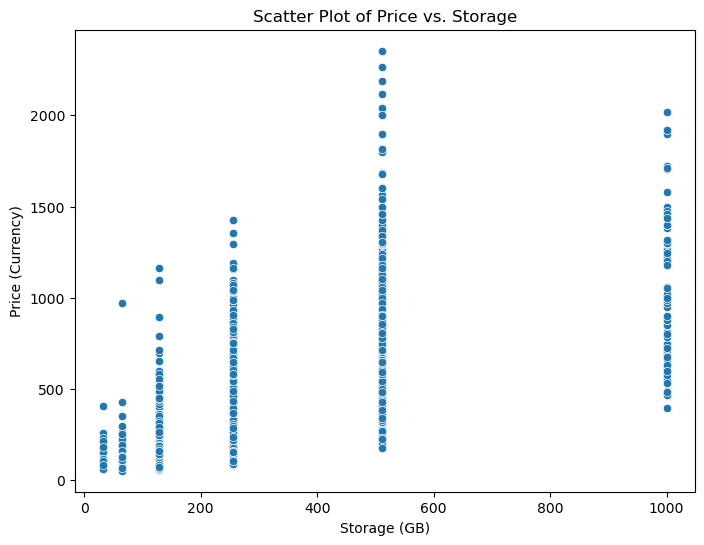

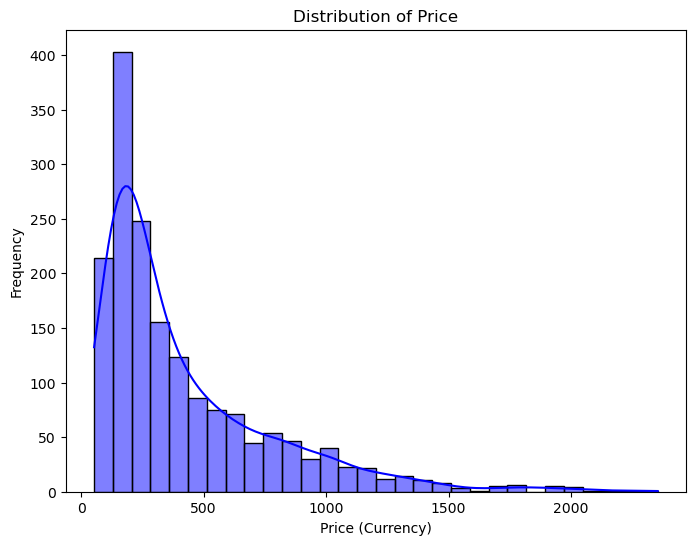

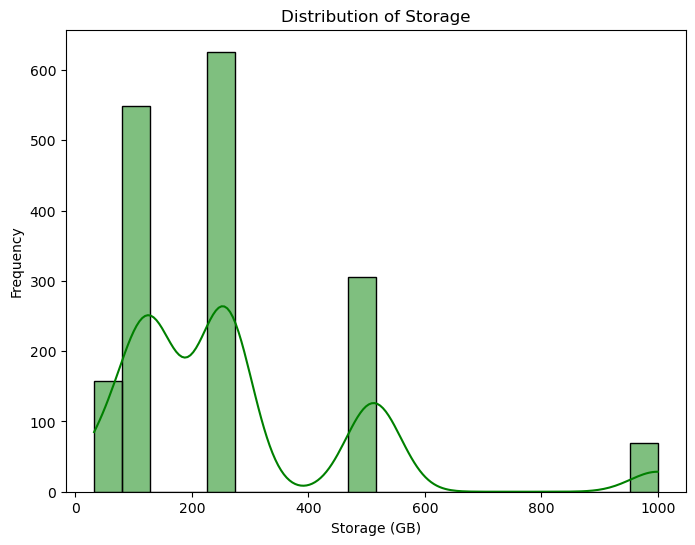

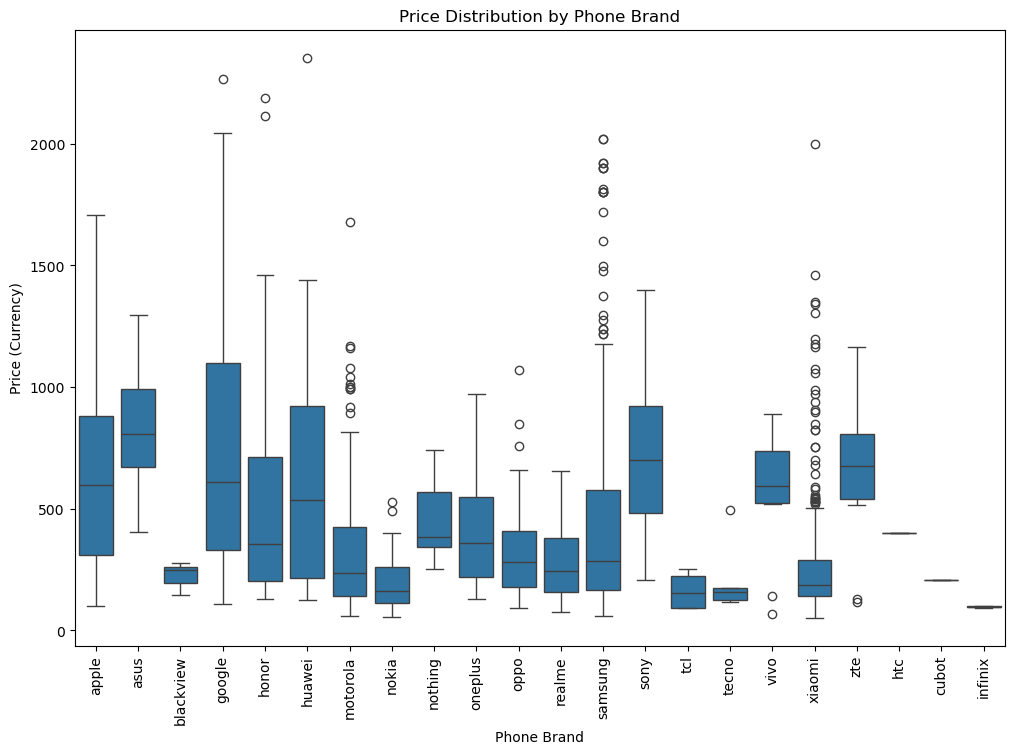

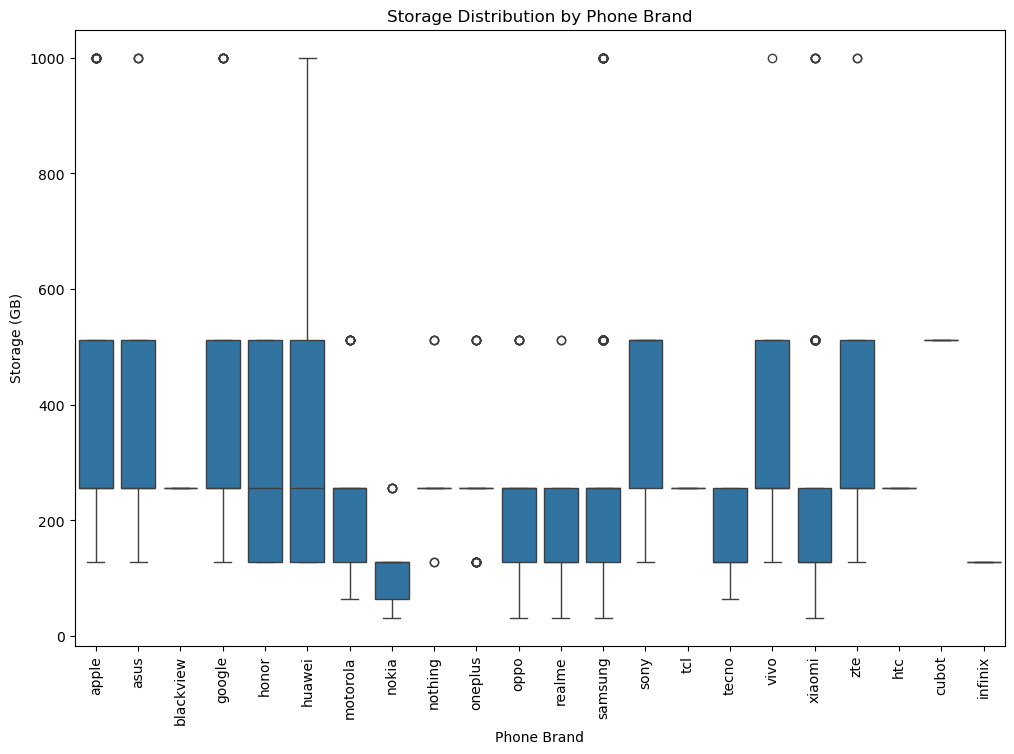

In [70]:
import matplotlib.pyplot as plt
import seaborn as sns

# scatter plot of price vs storage
plt.figure(figsize=(8, 6))
sns.scatterplot(x='storage', y='price_usd', data=df_selected)
plt.title('Scatter Plot of Price vs. Storage')
plt.xlabel('Storage (GB)')
plt.ylabel('Price (Currency)')
plt.show()

# histogram of price
plt.figure(figsize=(8, 6))
sns.histplot(df_selected['price_usd'], bins=30, kde=True, color='blue')
plt.title('Distribution of Price')
plt.xlabel('Price (Currency)')
plt.ylabel('Frequency')
plt.show()

# histogram of storage
plt.figure(figsize=(8, 6))
sns.histplot(df_selected['storage'], bins=20, kde=True, color='green')
plt.title('Distribution of Storage')
plt.xlabel('Storage (GB)')
plt.ylabel('Frequency')
plt.show()

# histograms of price by phone brand
plt.figure(figsize=(12, 8))
sns.boxplot(x='phone_brand', y='price_usd', data=df_selected)
plt.title('Price Distribution by Phone Brand')
plt.xlabel('Phone Brand')
plt.ylabel('Price (Currency)')
plt.xticks(rotation=90)
plt.show()

# histograms of storage by phone brand
plt.figure(figsize=(12, 8))
sns.boxplot(x='phone_brand', y='storage', data=df_selected)
plt.title('Storage Distribution by Phone Brand')
plt.xlabel('Phone Brand')
plt.ylabel('Storage (GB)')
plt.xticks(rotation=90)
plt.show()


This is a visualization of the previous data we've extracted from the dataset. We have a few different plots, comparting storage and prices, price of phone brands, and storage of phone brands, so we can easily compare them to each other. We also have general price, and we see that most phones settle between 200-350 dollars on average, which surprised me.

## Analysis of Phone Dataset 

In this I looked at this dataset containing various phone specs, and chose to focus on the price and storage attributes across different phone brands. The  helps us understand how price and storage vary across brands, and how these two variables are distributed.

1. **Price Distribution**:
   - The price distribution shows significant variation, with some phones being MUCH more expensive than others. The scatter plot of price vs. storage suggests that phones with larger storage tend to have higher prices, though there are some exceptions, with some budget phones providing unusually high amounts of storage, with the most common being around ~128gb.
   
2. **Storage Distribution**:
   - The storage distribution is relatively concentrated around certain values, with most phones falling in the 64GB to 128GB range. The boxplot of storage by phone brand shows that some brands tend to offer more storage in their devices than others.

3. **Brand Comparisons**:
   - From the statistics grouped by phone brand, we can see that premium brands like Apple and Samsung have higher mean prices, while budget brands offer lower prices on average. Additionally, storage capacities vary significantly across brands, with some offering higher storage options or wide berths of available storage options all available at the same time to meet the needs of the user.

### Conclusion:
The dataset provides a look into the pricing strategies and storage options available across different phone brands as well as a brief look at their corrolations. It appears that more expensive phones tend to offer larger storage capacities, but not always. It would be interesting to look into other factors such as the phone's chipset, camera, and other features that might affect price, such as quantity of RAM.
